In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.spatial import distance
from scipy.stats import ks_2samp
from scipy.optimize import curve_fit
from math import inf
import seaborn as sns
import random

In [2]:
age_to_be_analysed = 28 # change to 28 if you need to
time = np.linspace(0,30,1799)

if age_to_be_analysed == 56:
    analysis_df = pd.read_pickle('C:\\Users\\gemmera\\Anaconda3\\OWNscripts\\TRex_analysis_56dpf.pkl')
    analysis_df = pd.DataFrame.from_dict({(i,j): analysis_df[i][j]
                           for i in analysis_df.keys()
                           for j in analysis_df[i].keys()},
                       orient='index')
    levelList = [list for list in analysis_df.index[[0]].levels]
    levelList[0] = ['oxtrl KO' , 'oxtrl WT' , 'oxtr KO' , 'oxtr WT' , '$pth2^{-/-}$' , '$pth2^{+/+}$']
    
elif age_to_be_analysed == 28:
    analysis_df = pd.read_pickle('C:\\Users\\gemmera\\Anaconda3\\OWNscripts\\TRex_analysis_28dpf.pkl')
    analysis_df = pd.DataFrame.from_dict({(i,j): analysis_df[i][j]
                           for i in analysis_df.keys()
                           for j in analysis_df[i].keys()},
                       orient='index')
    levelList = [list for list in analysis_df.index[[0]].levels]
    levelList[0] = ['oxtrl KO' , 'oxtrl WT' , 'oxtr KO' , 'oxtr WT']
    
analysis_df.index.set_levels(levelList, inplace = True)
genotypes = analysis_df.index[[0]].levels[0] #save the different genotypes analysed in a separate array to loop through


In [3]:
def centroid_position(video, nFrames):
    centroid_array =  np.empty([nFrames, 2])
    for i in range(0, nFrames):  
        x = video[i] # get frame by frame  
        x[x == inf] = np.nan #inf -> nan
        
        centroid = np.array([[np.nanmean(x[:, 0]), np.nanmean(x[:, 1])]])
        
        centroid_array[i] = centroid
    return centroid_array

In [4]:
for genotype in genotypes:
    
    nVideos = len(analysis_df['trajectory'][genotype][:])
    #output = []
    
    for j in range (0, nVideos): 
        x = analysis_df.loc[genotype]['trajectory'][j][0:54000:30, :, :] # all coordinates from one video
        Frames = len(analysis_df['trajectory'][genotype][j][0:54000:30, 0, 0]) # n frames of current video
        #output.append(centroid_position(x, Frames))
        if 'centroid_dict' not in locals():
            centroid_dict = {genotype: {j: centroid_position(x, Frames)}}
        elif genotype not in centroid_dict:
            centroid_dict[genotype] = {j: centroid_position(x, Frames)}
        else:
            centroid_dict[genotype][j] = centroid_position(x, Frames)

<ipython-input-3-5f71d3db69ae>:7: RuntimeWarning: Mean of empty slice
  centroid = np.array([[np.nanmean(x[:, 0]), np.nanmean(x[:, 1])]])


In [5]:
centroid_df = pd.DataFrame.from_dict({i: centroid_dict[i]
                           for i in centroid_dict.keys() 
                           },
                       orient='index')

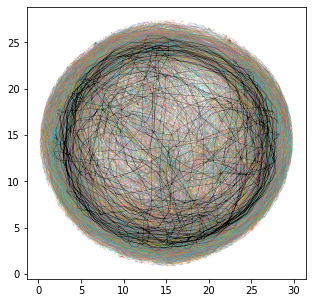

In [6]:
x = analysis_df.loc['oxtr KO']['trajectory'][0][:, :, :] 

fig = plt.figure(figsize = (5,5))

plt.plot(x[:,:,0] , x[:,:,1], linewidth = 0.1)
plt.plot(centroid_df.transpose()['oxtr KO'][0][:,0] , centroid_df.transpose()['oxtr KO'][0][:,1], 'k', linewidth = 0.2)

In [7]:
# get distance travelled by shoal
centroid_dist_df = centroid_df.transpose().copy(deep = True)

for genotype in genotypes:
    #fig = plt.figure()
    nVideos = len(analysis_df['trajectory'][genotype][:])
    
    for j in range(0 , nVideos):
        print(genotype + ": " + str(j))
        dist = np.sqrt(np.power(centroid_df.transpose()[genotype][j][1:,0] - centroid_df.transpose()[genotype][j][0:-1,0], 2) + 
               np.power(centroid_df.transpose()[genotype][j][1:,1] - centroid_df.transpose()[genotype][j][0:-1,1], 2))
        #plt.plot(np.linspace(0,30,53999),np.cumsum(dist), 'k')
        centroid_dist_df[genotype][j] = np.nancumsum(dist)

oxtrl KO: 0
oxtrl KO: 1
oxtrl KO: 2
oxtrl KO: 3
oxtrl KO: 4
oxtrl KO: 5
oxtrl KO: 6
oxtrl KO: 7
oxtrl KO: 8
oxtrl KO: 9
oxtrl KO: 10
oxtrl KO: 11
oxtrl KO: 12
oxtrl KO: 13
oxtrl KO: 14
oxtrl KO: 15
oxtrl KO: 16
oxtrl KO: 17
oxtrl KO: 18
oxtrl KO: 19
oxtrl KO: 20
oxtrl KO: 21
oxtrl KO: 22
oxtrl KO: 23
oxtrl KO: 24
oxtrl KO: 25
oxtrl KO: 26
oxtrl KO: 27
oxtrl WT: 0
oxtrl WT: 1
oxtrl WT: 2
oxtrl WT: 3
oxtrl WT: 4
oxtrl WT: 5
oxtrl WT: 6
oxtrl WT: 7
oxtrl WT: 8
oxtrl WT: 9
oxtrl WT: 10
oxtrl WT: 11
oxtrl WT: 12
oxtrl WT: 13
oxtrl WT: 14
oxtr KO: 0
oxtr KO: 1
oxtr KO: 2
oxtr KO: 3
oxtr KO: 4
oxtr KO: 5
oxtr KO: 6
oxtr KO: 7
oxtr KO: 8
oxtr KO: 9
oxtr KO: 10
oxtr KO: 11
oxtr KO: 12
oxtr KO: 13
oxtr KO: 14
oxtr KO: 15
oxtr KO: 16
oxtr KO: 17
oxtr KO: 18
oxtr KO: 19
oxtr KO: 20
oxtr KO: 21
oxtr KO: 22
oxtr KO: 23
oxtr KO: 24
oxtr WT: 0
oxtr WT: 1
oxtr WT: 2
oxtr WT: 3
oxtr WT: 4
oxtr WT: 5
oxtr WT: 6
oxtr WT: 7
oxtr WT: 8
oxtr WT: 9
oxtr WT: 10
oxtr WT: 11
oxtr WT: 12
oxtr WT: 13
oxtr WT: 14
o

In [8]:
dist

array([3.55548322, 3.85977335, 3.5763178 , ..., 1.12571542, 1.89363769,
       1.33875934])

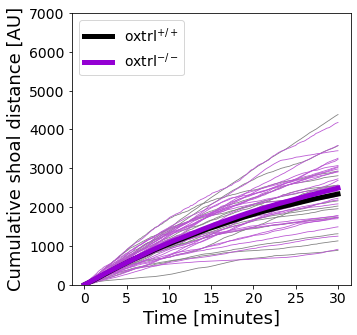

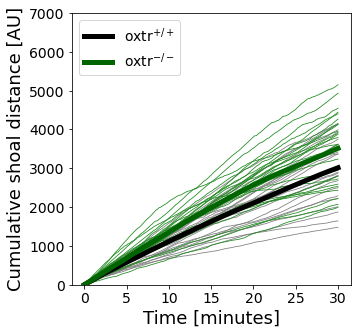

In [9]:
time = np.transpose(np.linspace(0,30,1799))

fig, ax = plt.subplots(figsize = (5 , 5))
for traj in centroid_dist_df['oxtrl WT'][0:15]:
    if np.isnan(traj).all() == False:
        plt.plot(time, traj, 'grey', linewidth = 0.8)

    
for traj in centroid_dist_df['oxtrl KO']:
    if np.isnan(traj).all() == False:
        plt.plot(time, traj, 'mediumorchid', linewidth = 0.8)

plt.plot(time, centroid_dist_df['oxtrl WT'][0:15].mean(), 'k', linewidth = 5, label='$\mathregular{oxtrl^{+/+}}$')        
plt.plot(time, centroid_dist_df['oxtrl KO'].mean(), 'darkviolet', linewidth = 5, label='$\mathregular{oxtrl^{-/-}}$')

plt.legend(loc = 'upper left', fontsize=14)
#plt.title('oxtrl')

ax.set_ylim(0,7000)
#ax.spines['bottom'].set_color('#b6b6b6')
#ax.spines['top'].set_color('#b6b6b6')
#ax.spines['left'].set_color('#b6b6b6')
#ax.spines['right'].set_color('#b6b6b6')
#ax.tick_params(axis='x', colors='#b6b6b6')
#ax.tick_params(axis='y', colors='#b6b6b6')
#ax.yaxis.label.set_color('#b6b6b6')
#ax.xaxis.label.set_color('#b6b6b6')
#ax.title.set_color('#b6b6b6')
ax.set_facecolor("white")
ax.set_xlabel('Time [minutes]', fontsize=18)
ax.set_ylabel('Cumulative shoal distance [AU]', fontsize=18)
ax.set_xticks(ticks=(0,5,10,15,20,25,30))
ax.set_xticklabels(labels=(0,5,10,15,20,25,30), fontsize=14)
ax.set_yticks(ticks=(0,1000,2000,3000,4000,5000,6000,7000))
ax.set_yticklabels(labels=(0,1000,2000,3000,4000,5000,6000,7000), fontsize=14)

plt.savefig('centroid_oxtrlKO.svg', transparent=True, bbox_inches='tight')

fig, ax = plt.subplots(figsize = (5 , 5))
for traj in centroid_dist_df['oxtr WT']:
    if np.isnan(traj).all() == False:
        plt.plot(time, traj, 'grey', linewidth = 0.8)

    
for traj in centroid_dist_df['oxtr KO']:
    if np.isnan(traj).all() == False:
        plt.plot(time, traj, 'forestgreen', linewidth = 0.8)

plt.plot(time, centroid_dist_df['oxtr WT'].mean(), 'k', linewidth = 5, label='$\mathregular{oxtr^{+/+}}$')
plt.plot(time, centroid_dist_df['oxtr KO'].mean(), 'darkgreen', linewidth = 5, label='$\mathregular{oxtr^{-/-}}$')

plt.legend(loc = 'upper left', fontsize=14)
#plt.title('OxtR')

ax.set_ylim(0,7000)
#ax.spines['bottom'].set_color('#b6b6b6')
#ax.spines['top'].set_color('#b6b6b6')
#ax.spines['left'].set_color('#b6b6b6')
#ax.spines['right'].set_color('#b6b6b6')
#ax.tick_params(axis='x', size=18)
#ax.tick_params(axis='y', size=18)
#ax.yaxis.label.set_color('#b6b6b6')
#ax.xaxis.label.set_color('#b6b6b6')
#ax.title.set_color('#b6b6b6')
ax.set_facecolor("white")
ax.set_xlabel('Time [minutes]', fontsize=18)
ax.set_ylabel('Cumulative shoal distance [AU]', fontsize=18)
ax.set_xticks(ticks=(0,5,10,15,20,25,30))
ax.set_xticklabels(labels=(0,5,10,15,20,25,30), fontsize=14)
ax.set_yticks(ticks=(0,1000,2000,3000,4000,5000,6000,7000))
ax.set_yticklabels(labels=(0,1000,2000,3000,4000,5000,6000,7000), fontsize=14)
plt.savefig('centroid_oxtrKO.svg', transparent=True, bbox_inches='tight')  

#fig, ax = plt.subplots(figsize = (5 , 5))
#for traj in centroid_dist_df['$pth2^{+/+}$']:
#    if np.isnan(traj).all() == False:
#        plt.plot(time, traj, 'g', linewidth = 0.8)

    
#for traj in centroid_dist_df['$pth2^{-/-}$']:
#    if np.isnan(traj).all() == False:
#        plt.plot(time, traj, 'm', linewidth = 0.8)
#plt.plot(time, centroid_dist_df['$pth2^{-/-}$'].mean(), 'm', linewidth = 5)
#plt.plot(time, centroid_dist_df['$pth2^{+/+}$'].mean(), 'g', linewidth = 5)
#plt.title('Pth2')

#ax.set_ylim(0,7000)
#ax.spines['bottom'].set_color('#b6b6b6')
#ax.spines['top'].set_color('#b6b6b6')
#ax.spines['left'].set_color('#b6b6b6')
#ax.spines['right'].set_color('#b6b6b6')
#ax.tick_params(axis='x', colors='#b6b6b6')
#ax.tick_params(axis='y', colors='#b6b6b6')
#ax.yaxis.label.set_color('#b6b6b6')
#ax.xaxis.label.set_color('#b6b6b6')
#ax.title.set_color('#b6b6b6')
#ax.set_facecolor("black")
#ax.set_xlabel('Time [minutes]')
#ax.set_ylabel('Cumulative shoal distance [AU]')
#plt.savefig('centroid_Pth2.png', transparent=True, bbox_inches='tight')  

In [10]:
for traj in centroid_dist_df['oxtrl WT']:
    if np.isnan(traj).all() == False:
        print(np.shape(traj))

(1799,)
(1799,)
(1799,)
(1799,)
(1799,)
(1799,)
(1799,)
(1799,)
(1799,)
(1799,)
(1799,)
(1799,)
(1799,)
(1799,)
(1799,)


How to compare timeseries data: Check out this [thread](https://stats.stackexchange.com/questions/19103/how-to-statistically-compare-two-time-series) on stats.stackexchange.

_"As others have stated, you need to have a common frequency of measurement (i.e. the time between observations). With that in place I would identify a common model that would reasonably describe each series separately. This might be an ARIMA model or a multiply-trended Regression Model with possible Level Shifts or a composite model integrating both memory (ARIMA) and dummy variables. This common model could be estimated globally and separately for each of the two series and then one could construct an F test to test the hypothesis of a common set of parameters."_

Another idea: Compare the area between the curves with the area between curves that are the result of random re-assignment of cluster identity.
The computation of the sum of squares goes into the same direction.

In [34]:
for i in range (0,25):
    c = centroid_dist_df['oxtr KO'][i][1798]
    print (c)

#for i in range (0,21):
  #  d = centroid_dist_df['oxtr KO'][i][1798]
 #   print ("oxtr KO", i, "-", d)
    
#for i in range (0,23):
   # e = centroid_dist_df['oxtrl WT'][i][1798]
  #  print ("oxtrl WT", i, "-", e)
    
#for i in range (0,22):
 #   f = centroid_dist_df['oxtrl KO'][i][1798]
  #  print ("oxtrl KO", i, "-", f)
    


3956.5150442049203
4547.3677257861245
3793.141703256253
4405.096222323106
5153.351741440907
2593.244701405882
2724.2487421565174
2945.8280512396564
3237.0101152324532
4128.574727108766
4446.605864564704
2530.6724417441665
3915.4207140516546
3545.746343676004
2219.4672689834883
2436.358420975282
4268.209082652521
3622.2963229616116
1993.759023224264
2072.202060495297
3615.972628776538
3880.213031325967
4933.72918065149
4140.628720841172
2792.8841790522183


In [ ]:
# assemble different centroid data arrays into a common dataframe
genotype_pairs = [["ILR1K", "ILR1w"], ["ILR2K", "ILR2w"], ["MT02KO", "MT02WT"]]

for pair in genotype_pairs:
    # mutant
    df_mutant = [i for i in centroid_dist_df[pair[0]] if type(i) == np.ndarray]
    n_mutant = len(df_mutant)

    # wildtype
    df_wt = [i for i in centroid_dist_df[pair[1]] if type(i) == np.ndarray]
    n_wt = len(df_wt)

    # compute difference between wt and mutant
    abc = np.nansum(np.nanmean(df_mutant , axis = 0)) - np.nansum(np.nanmean(df_wt , axis = 0)) # area between curves

    # create dataframe containing all arrays to randomly sample from
    shuffle_df = pd.DataFrame(np.concatenate((df_mutant, df_wt), axis = 0)).transpose()
    rand_abc_dist = np.zeros(1000)

    for i in range(1000):
        id_mutant = random.sample(range(0, n_wt + n_mutant), n_mutant)
        id_wildtype = [i for i in range(0, n_wt + n_mutant) if i not in id_mutant]
        rand_abc_dist[i] = np.sum(shuffle_df[id_wildtype].mean(axis = 1)) - np.sum(shuffle_df[id_mutant].mean(axis = 1))
    print(abc)
    
    fig, ax = plt.subplots()
    plt.hist(rand_abc_dist, bins=50)
    plt.vlines(x = abc, ymin = 0, ymax = 90)
    ax.set_ylim(0,75)
    ax.set_xlim(-1000000, 1000000)
    

In [ ]:
# I now want to model the cumulative curve plotted above as logarithmic functions. Two models will be fitted for each genotype:
# 1. a general logarithmic function for all replicates
# 2. two separate logarithmic functions, one for each genotype.

# create dataframe

replicate_counter = 0
background = 0
time = np.linspace(1 , 1800, 1799 , dtype = 'int')

genotype_pairs = [["ILR1K", "ILR1w"], ["ILR2K", "ILR2w"], ["MT02KO", "MT02WT"]]

for pair in genotype_pairs:
    # mutant
    df_mutant = [i for i in centroid_dist_df[pair[0]] if type(i) == np.ndarray]
    for replicate in df_mutant:
        data = {'centroid' : replicate , 
               'time': time ,
               'genotype' : np.repeat(pair[0], 1799), 
               'replicate' : np.repeat(replicate_counter, 1799), 
               'background' : np.repeat(background, 1799)}
        replicate_counter += 1
        if 'centroid_df_pd' not in locals(): 
            centroid_df_pd = pd.DataFrame.from_dict(data)
        else: centroid_df_pd = centroid_df_pd.append(pd.DataFrame.from_dict(data), ignore_index = True)
    # wildtype
    df_wt = [i for i in centroid_dist_df[pair[1]] if type(i) == np.ndarray]
    for replicate in df_wt:
        data = {'centroid' : replicate , 
               'time': time ,
               'genotype' : np.repeat(pair[1], 1799), 
               'replicate' : np.repeat(replicate_counter, 1799),
               'background' : np.repeat(background, 1799)}
        replicate_counter += 1
        centroid_df_pd = centroid_df_pd.append(pd.DataFrame.from_dict(data), ignore_index = True)
    background += 1

In [ ]:
from pygam import LinearGAM, GAM, s, f, l
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GroupKFold

le = preprocessing.LabelEncoder()

centroid_df_pd = centroid_df_pd.dropna()

background = 0
fit_df = centroid_df_pd[centroid_df_pd['background'] == background ]
le.fit(fit_df['genotype'].unique())
fit_df['genotype_label'] = le.transform(fit_df['genotype'])

y = fit_df[['centroid', 'replicate']]

X = fit_df[['time','genotype_label', 'replicate']]


train_id, test_id = train_test_split(X['replicate'].unique())
train_id = np.nonzero(np.in1d(X['replicate'], train_id))[0]
test_id = np.nonzero(np.in1d(X['replicate'], test_id))[0]

X_train = X.iloc[train_id]
y_train = y.iloc[train_id]['centroid']
X_test = X.iloc[test_id]
y_test = y.iloc[test_id]['centroid']

m0 = LinearGAM(l(0)) # linear function of time
m0.fit(X_train, y_train)

m1 = GAM(l(0) + f(1)) # linear function of time + factor function of genotype
m1.fit(X_train, y_train)

m2 = GAM(s(0, n_splines = 30)) # spline function over time
m2.fit(X_train, y_train)

m3 = GAM(s(0, n_splines = 30) + f(1)) # spline functions over time + factor function of genotype
m3.fit(X_train, y_train)

In [ ]:
centroid_df_pd.to_csv('centroid_data.csv' , index = False)
# continue in R...

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(pd.DataFrame(output[0]).loc[0:300,0], pd.DataFrame(output[0]).loc[0:300,1], '--r')

plt.plot(x[0:300,:,0], x[0:300,:,1], linewidth = 0.5)
ax.set_xlim(0,30)
ax.set_ylim(0,30)
ax.axis('off')
plt.savefig('centroid_0.png', transparent=True)    


fig, ax = plt.subplots(figsize=(5,5))
plt.plot(pd.DataFrame(output[0]).loc[10000:10300,0], pd.DataFrame(output[0]).loc[10000:10300,1], '--r')

plt.plot(x[10000:10300,:,0], x[10000:10300,:,1], linewidth = 0.5)
ax.set_xlim(0,30)
ax.set_ylim(0,30)
ax.axis('off')
plt.savefig('centroid_10.png', transparent=True)  

fig, ax = plt.subplots(figsize=(5,5))
plt.plot(pd.DataFrame(output[0]).loc[50000:50300,0], pd.DataFrame(output[0]).loc[50000:50300,1], '--r')

plt.plot(x[50000:50300,:,0], x[50000:50300,:,1], linewidth = 0.5)
ax.set_ylim(0,30)
ax.set_xlim(0,30)
ax.axis('off')
plt.savefig('centroid_20.png', transparent=True)  

fig, ax = plt.subplots(figsize=(5,5))
plt.plot(pd.DataFrame(output[0]).loc[25000:25300,0], pd.DataFrame(output[0]).loc[25000:25300,1], '--r')

plt.plot(x[25000:25300,:,0], x[25000:25300,:,1], linewidth = 0.5)
ax.set_ylim(0,30)
ax.set_xlim(0,30)
ax.axis('off')
plt.savefig('centroid_30.png', transparent=True)  